In [ ]:
import keras
from tensorflow.keras.layers import Activation, Dense, Input ,Conv2D, Flatten, MaxPooling2D,Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
np.random.seed(1337)

In [ ]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) =fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
x_train = np.expand_dims(train_images,axis=3)
x_test = np.expand_dims(test_images,axis=3)
x_train = x_train.astype('float32') / 255      
x_test = x_test.astype('float32') / 255

In [ ]:
noise = np.random.normal(loc=0.2, scale=0.1, size=x_train.shape)
x_train_noisy = x_train + noise
noise = np.random.normal(loc=0.2, scale=0.1, size=x_test.shape)
x_test_noisy = x_test + noise
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [ ]:
input = Input(shape=([x_test_noisy.shape[1],x_test_noisy.shape[2],x_test_noisy.shape[3]]), name='encoder_input')

x = Conv2D(64, (3,3), activation="relu", padding="same")(input)
x = MaxPooling2D((2, 2), padding="same")(x)
x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
encoded = MaxPooling2D((2, 2), padding="same")(x)

x = Conv2DTranspose(64, (3, 3), strides=2, activation="relu", padding="same")(encoded)
x = Conv2DTranspose(64, (3, 3), strides=2, activation="relu", padding="same")(x)
decoded = Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x) 

In [ ]:
# Autoencoder
autoencoder = Model(input, decoded)
autoencoder.compile(optimizer='sgd', loss="MeanSquaredError")
autoencoder.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 14, 14, 64)        36928     
                                                                 
 conv2d_23 (Conv2D)          (None, 14, 14, 64)        36928     
                                                                 
 conv2d_24 (Conv2D)          (None, 14, 14, 64)        36928     
                                                           

In [ ]:
autoencoder.fit(x = x_train_noisy,
                y = x_train,
                validation_split = 0.4,
                epochs=20,
                shuffle = True,
                batch_size=128)

Epoch 1/20
282/282 [==============================] - 8s 24ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 2/20
282/282 [==============================] - 7s 25ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 3/20
282/282 [==============================] - 7s 26ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 4/20
282/282 [==============================] - 6s 22ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 5/20
282/282 [==============================] - 7s 26ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 6/20
282/282 [==============================] - 7s 26ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 7/20
282/282 [==============================] - 7s 26ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 8/20
282/282 [==============================] - 6s 22ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 9/20
282/282 [==============================] - 6s 22ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 10/20
282/282 [==============================] - 7s 23ms/step - loss: 0.0027 - val_lo

313/313 [==============================] - 1s 3ms/step


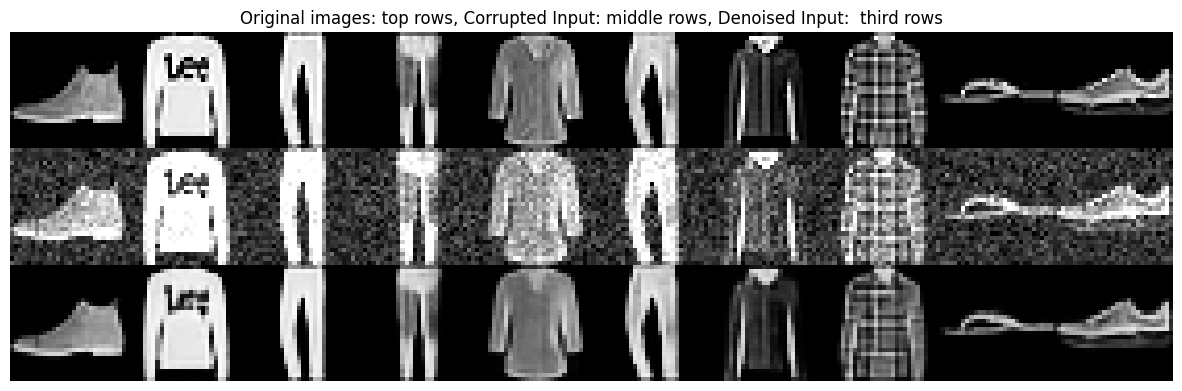

In [ ]:
# Predict the Autoencoder output from corrupted test images
x_decoded = autoencoder.predict(x_test_noisy)

# Display the 1st 10 corrupted and denoised images
rows, cols = 1, 10
num = rows * cols
imgs = np.concatenate([x_test[:num], x_test_noisy[:num], x_decoded[:num]])
imgs = imgs.reshape((rows * 3, cols, x_test_noisy.shape[1], x_test_noisy.shape[2]))
imgs = np.vstack(np.split(imgs, rows, axis=1))
imgs = imgs.reshape((rows * 3, -1, x_test_noisy.shape[1], x_test_noisy.shape[2]))
imgs = np.vstack([np.hstack(i) for i in imgs])
imgs = (imgs * 255).astype(np.uint8)
fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(15)
plt.axis('off')
plt.title('Original images: top rows, '
          'Corrupted Input: middle rows, '
          'Denoised Input:  third rows')
plt.imshow(imgs, interpolation='none', cmap='gray')
Image.fromarray(imgs).save('corrupted_and_denoised.png')
plt.show()